# LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('homeprices.csv')

,area
0,2600
1,3000
2,3200
3,3600
4,4000


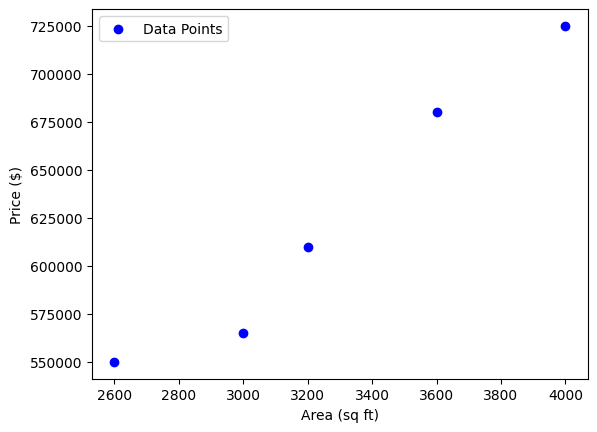

In [7]:
plt.scatter(df.area, df.price, color='blue', marker='o', label='Data Points')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.legend()

In [11]:
reg = linear_model.LinearRegression() #Creates an object for LinearRegression
reg.fit(df[['area']], df.price) #Fits the model to the data, arg 1 is a 2D array (has to be a 2D array) of area values and arg 2 is the target variable (price)

LinearRegression()

In [14]:
reg.predict([[3300]]) #Predicts the price for an area of 3300 sq ft

C:\Users\mbsci\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [15]:
reg.coef_ #Coefficient of the linear regression line (slope)

array([135.78767123])

In [16]:
reg.intercept_

180616.43835616432

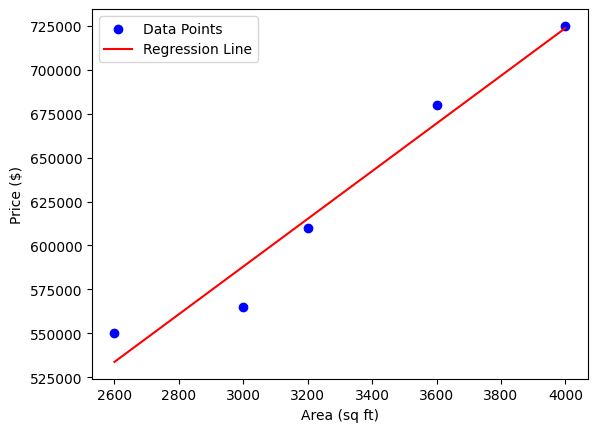

In [19]:
plt.scatter(df.area, df.price, color='blue', marker='o', label='Data Points')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.plot(df.area, reg.predict(df[['area']]), color='red', label='Regression Line')
plt.legend()

In [21]:
df_area = pd.read_csv('homeprices.csv')

In [23]:
reg.predict(df_area[['area']]) #Predicts prices for all areas in the dataframe

array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

In [25]:
df_area['predicted_price'] = reg.predict(df_area[['area']]) #Adds a new column with predicted prices
df_area.to_csv('predicted_prices.csv', index=False) #Saves the predicted prices to a new CSV file

In [29]:
# Exercise question with canada data
d = pd.read_csv('canada_per_capita_income.csv')
d.head() 

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [31]:
reg_canada = linear_model.LinearRegression()
reg_canada.fit(d[['year']], d['per capita income (US$)'])

LinearRegression()

In [32]:
reg_canada.predict([[2020]])  # Predicts per capita income for the year 2020

C:\Users\mbsci\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

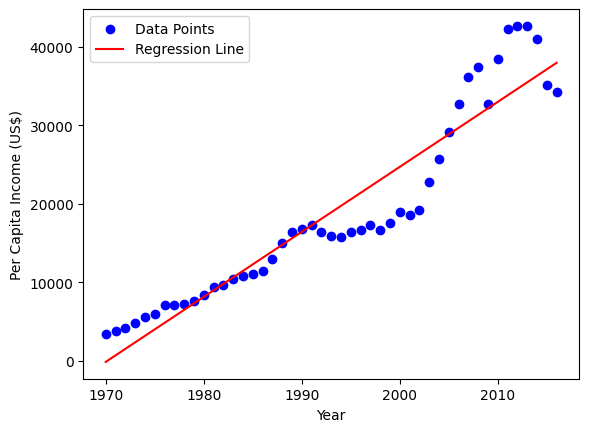

In [33]:
plt.scatter(d.year, d['per capita income (US$)'], color='blue', marker='o', label='Data Points')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.plot(d.year, reg_canada.predict(d[['year']]), color='red', label='Regression Line')
plt.legend()
plt.show()  # Displays the plot with the regression line

In [34]:
#Finding accuracy of the model by splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X = d[['year']]
y = d['per capita income (US$)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg_canada.fit(X_train, y_train)  # Fit the model on the training data
accuracy = reg_canada.score(X_test, y_test)  # Calculate the accuracy on the test data
print(f'Accuracy of the model: {accuracy:.2f}')  # Print the accuracy of the model

Accuracy of the model: 0.88
